# Series temporales

Para el trabajo con series temporales se recomienda el uso de la biblioteca [darts](https://unit8co.github.io/darts/).

In [2]:
import pandas as pd
from darts.datasets import AirPassengersDataset

dataset = AirPassengersDataset()

<Axes: xlabel='Month'>

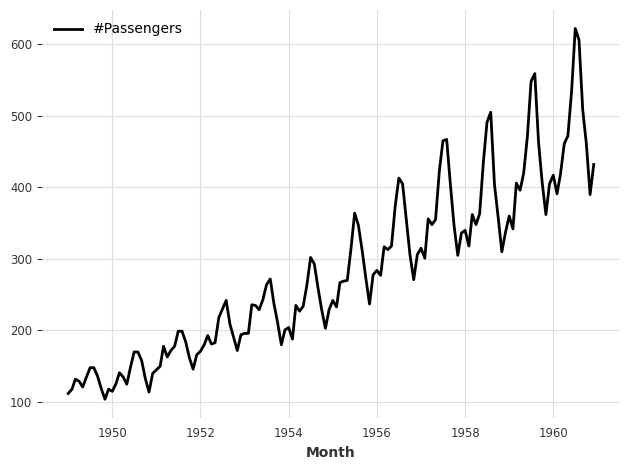

In [3]:
series = dataset.load()
series.plot()

<Axes: xlabel='Month'>

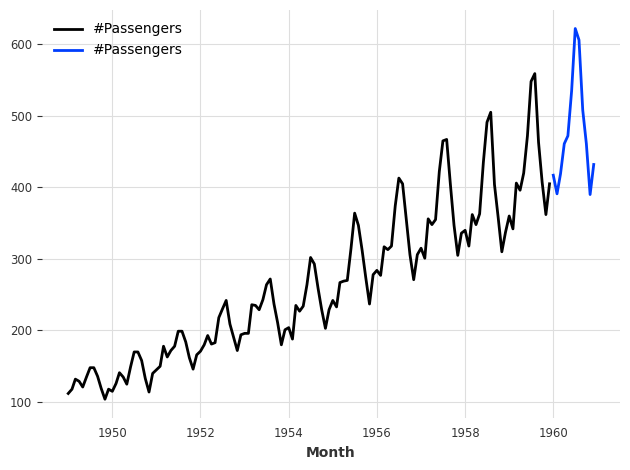

In [4]:
series_train, series_test = series.split_before(pd.Timestamp('1960'))

series_train.plot()
series_test.plot()

In [5]:
from darts.metrics import mae, rmse, mse, mape

def generate_metrics(series_test, series_pred):
    print(f"MAE  = {mae(series_test, series_pred):.2f}")
    print(f"MSE = {mse(series_test, series_pred):.2f}")
    print(f"RMSE = {rmse(series_test, series_pred):.2f}")
    print(f"MAPE = {mape(series_test, series_pred):.2f}")

The StatsForecast module could not be imported. To enable support for the AutoARIMA, AutoETS and Croston models, please consider installing it.
The `XGBoost` module could not be imported. To enable XGBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `XGBoost` module could not be imported. To enable XGBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


MAE  = 213.67
MSE = 51196.15
RMSE = 226.27
MAPE = 43.62


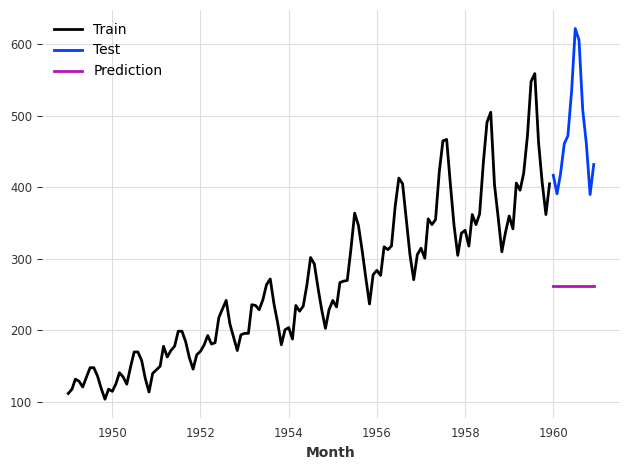

In [6]:
from darts.models import NaiveMean

model = NaiveMean()

model.fit(series_train)
series_pred = model.predict(12)

series_train.plot(label='Train')
series_test.plot(label='Test')
series_pred.plot(label='Prediction')

generate_metrics(series_test, series_pred)

MAE  = 66.31
MSE = 8587.05
RMSE = 92.67
MAPE = 12.42


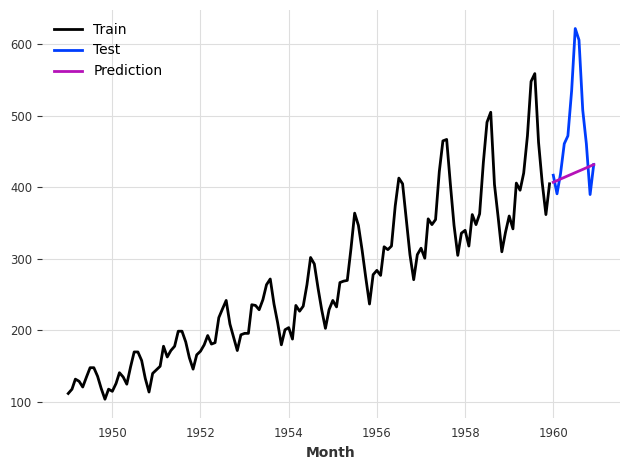

In [7]:
from darts.models import NaiveDrift

model = NaiveDrift()

model.fit(series_train)
series_pred = model.predict(12)

series_train.plot(label='Train')
series_test.plot(label='Test')
series_pred.plot(label='Prediction')

generate_metrics(series_test, series_pred)

MAE  = 57.64
MSE = 6323.79
RMSE = 79.52
MAPE = 10.98


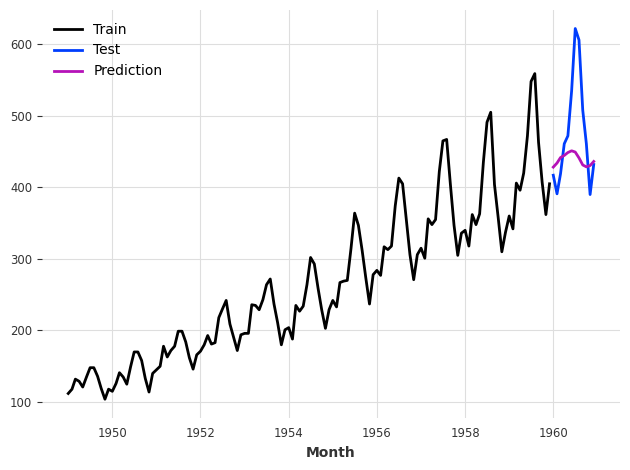

In [8]:
from darts.models import NaiveMovingAverage

model = NaiveMovingAverage(input_chunk_length=12)

model.fit(series_train)
series_pred = model.predict(12)

series_train.plot(label='Train')
series_test.plot(label='Test')
series_pred.plot(label='Prediction')

generate_metrics(series_test, series_pred)

MAE  = 57.64
MSE = 6323.79
RMSE = 79.52
MAPE = 10.98


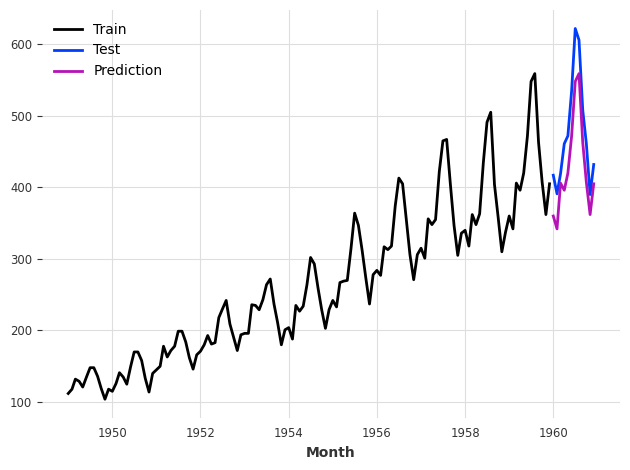

In [9]:
from darts.models import NaiveSeasonal

model = NaiveSeasonal(K=12)

model.fit(series_train)

series_train.plot(label='Train')
series_test.plot(label='Test')
model.predict(12).plot(label='Prediction')

generate_metrics(series_test, series_pred)

MAE  = 14.72
MSE = 305.81
RMSE = 17.49
MAPE = 3.13


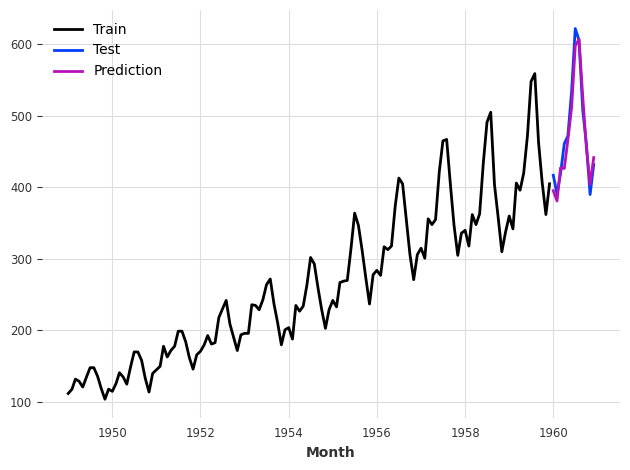

In [10]:
from darts.models import LinearRegressionModel

model = LinearRegressionModel(lags=12)

model.fit(series_train)
series_pred = model.predict(12)

series_train.plot(label='Train')
series_test.plot(label='Test')
series_pred.plot(label='Prediction')

generate_metrics(series_test, series_pred)

<Axes: xlabel='Month'>

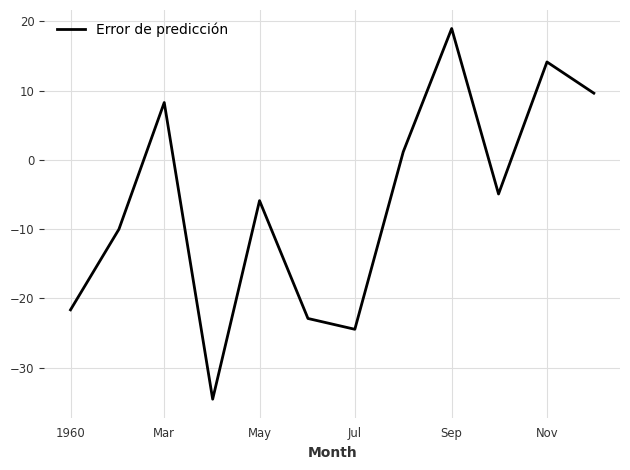

In [11]:
err = series_pred - series_test

err.plot(label='Error de predicción')

MAE  = 10.30
MSE = 249.97
RMSE = 15.81
MAPE = 2.21


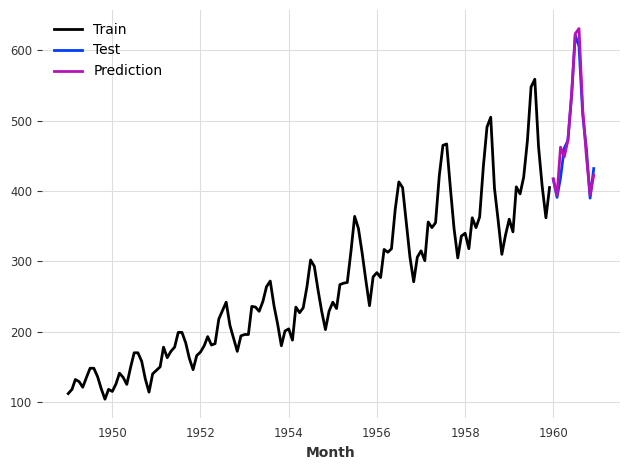

In [12]:
from darts.models import ExponentialSmoothing
from darts.utils.utils import ModelMode, SeasonalityMode

model = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal_periods=12, seasonal=SeasonalityMode.MULTIPLICATIVE)

model.fit(series_train)
series_pred = model.predict(12)

series_train.plot(label='Train')
series_test.plot(label='Test')
series_pred.plot(label='Prediction')

generate_metrics(series_test, series_pred)

/Users/miguel/workspace/ufm-python-for-finance/.venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/miguel/workspace/ufm-python-for-finance/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE  = 13.77
MSE = 305.97
RMSE = 17.49
MAPE = 2.94


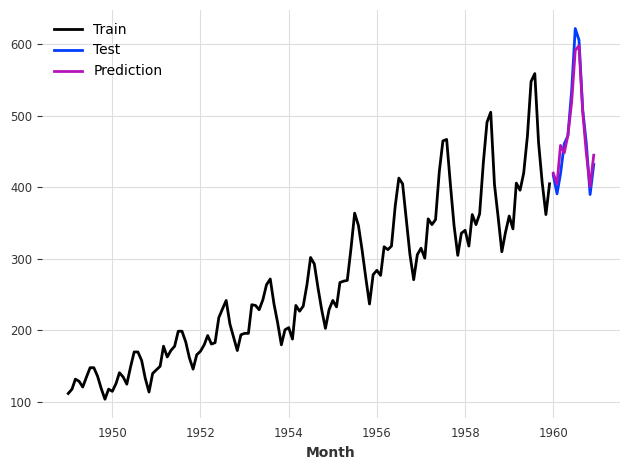

In [13]:
from darts.models import ARIMA

model = ARIMA()

model.fit(series_train)
series_pred = model.predict(12)

series_train.plot(label='Train')
series_test.plot(label='Test')
series_pred.plot(label='Prediction')

generate_metrics(series_test, series_pred)

## Extracción de estacionalidad y tendencia

<Axes: xlabel='Month'>

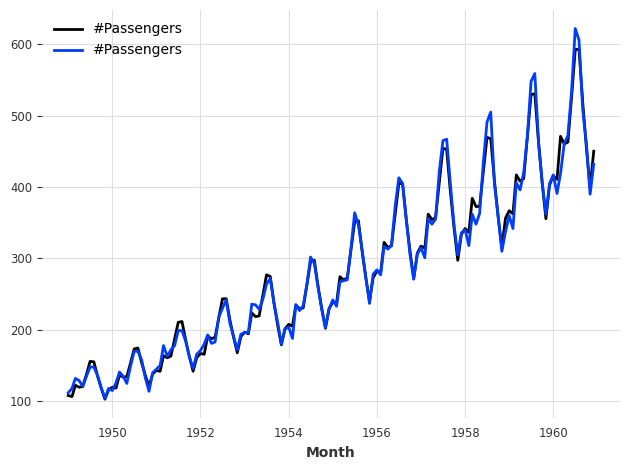

In [25]:
from darts.utils.statistics import extract_trend_and_seasonality

trend, seasonality = extract_trend_and_seasonality(series, method='naive', model=ModelMode.MULTIPLICATIVE)
(trend * seasonality).plot()
series.plot()

<Axes: xlabel='Month'>

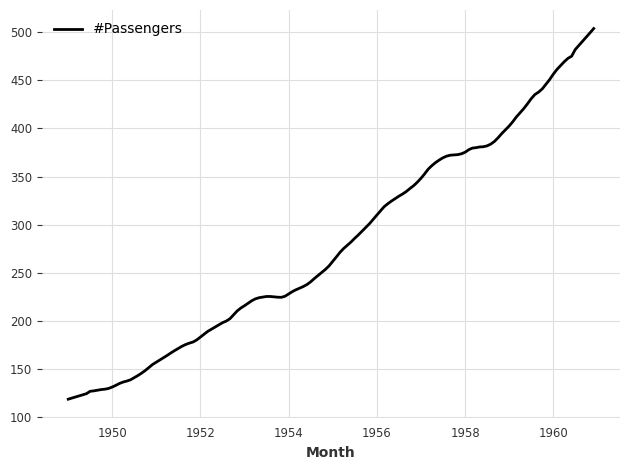

In [26]:
trend.plot()

<Axes: xlabel='Month'>

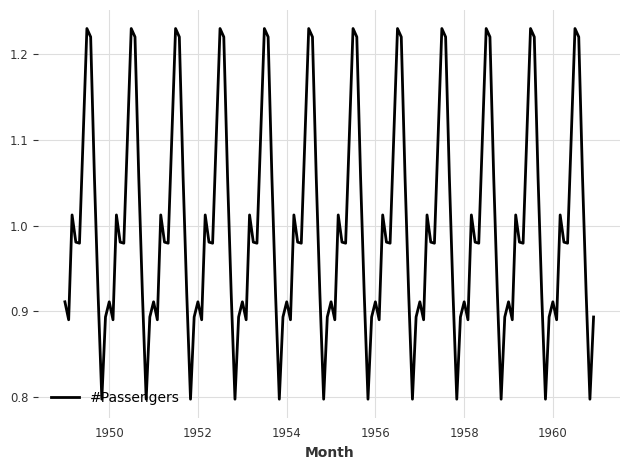

In [27]:
seasonality.plot()

<Axes: xlabel='Month'>

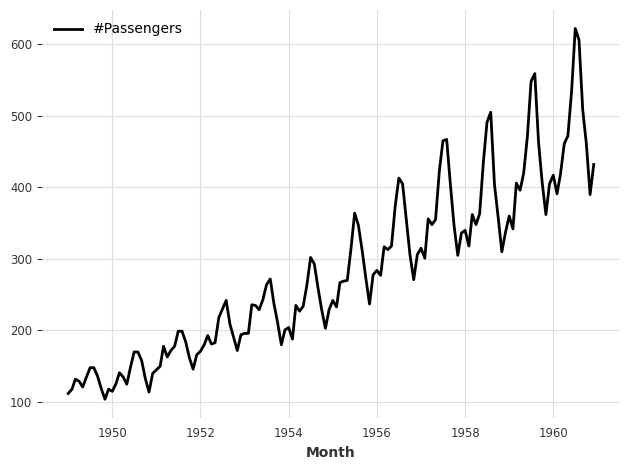

In [30]:
series.plot()

<Axes: xlabel='Month'>

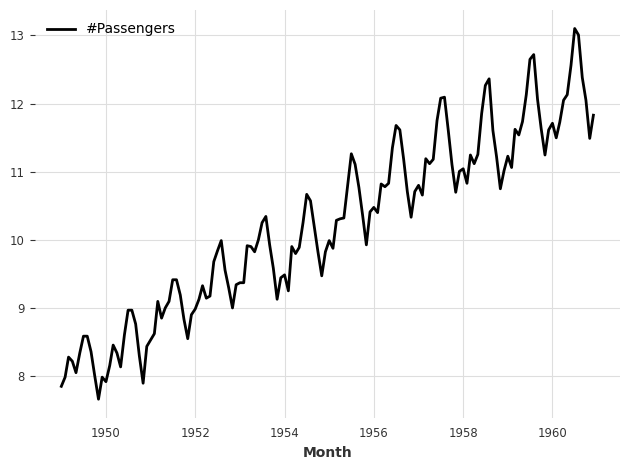

In [39]:
from darts.dataprocessing.transformers import BoxCox

transformer = BoxCox(lmbda=0.2)
series_transformed = transformer.fit_transform(series)

series_transformed.plot()

# transformer.inverse_transform(series_transformed).plot()

<Axes: xlabel='Month'>

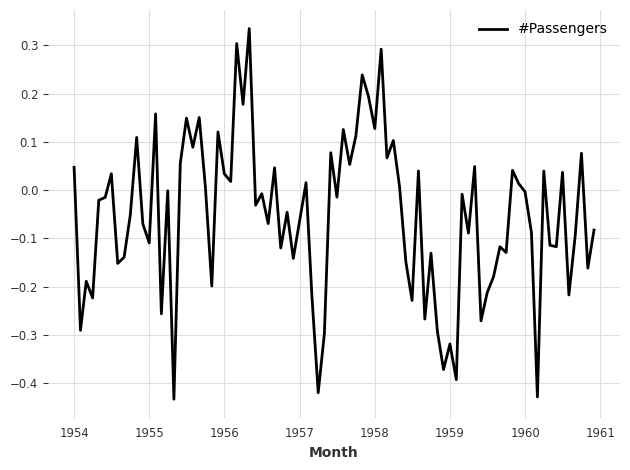

In [91]:
from darts.dataprocessing.transformers import Diff

series_diff = Diff(lags=[12, 48]).fit_transform(series_transformed)

series_diff.plot()

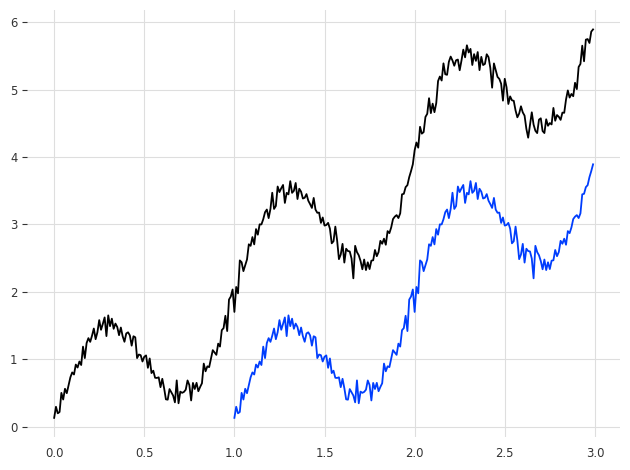

In [84]:
import numpy as np 
import matplotlib.pyplot as plt


t = np.arange(0, 3, .01)
noise = np.random.randn(len(t))*.1

y = np.sin(2*np.pi*t) + noise + 2*t

period_shift = int(1 / 0.01)  # = 628
y_shifted = np.zeros_like(y)
y_shifted[period_shift:] = y[:-period_shift]
y_shifted[:period_shift] = np.nan   # undefined for the first part

plt.plot(t, y)
plt.plot(t, y_shifted)

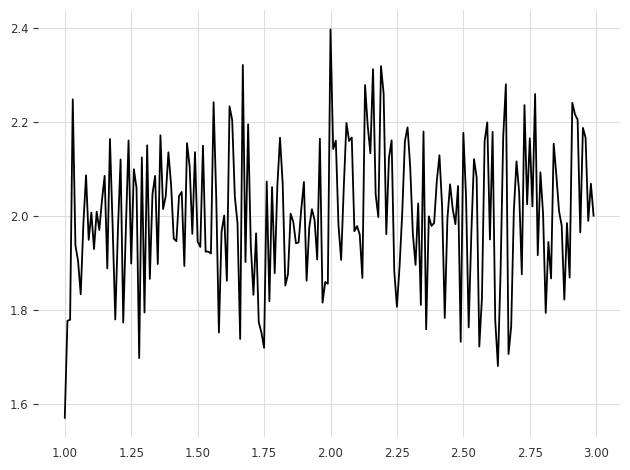

In [85]:
media = np.mean(y[100:]-y_shifted[100:])
plt.plot(t, y-y_shifted)

(array([ 1.,  2.,  2.,  2., 10.,  6.,  6., 12., 10., 17., 23., 20., 30.,
        19., 33., 17., 20., 15., 18.,  9., 12.,  3.,  3.,  2.,  8.]),
 array([-0.29930751, -0.27811898, -0.25693046, -0.23574194, -0.21455342,
        -0.1933649 , -0.17217638, -0.15098786, -0.12979934, -0.10861082,
        -0.0874223 , -0.06623378, -0.04504525, -0.02385673, -0.00266821,
         0.01852031,  0.03970883,  0.06089735,  0.08208587,  0.10327439,
         0.12446291,  0.14565143,  0.16683995,  0.18802847,  0.209217  ,
         0.23040552]),
 <BarContainer object of 25 artists>)

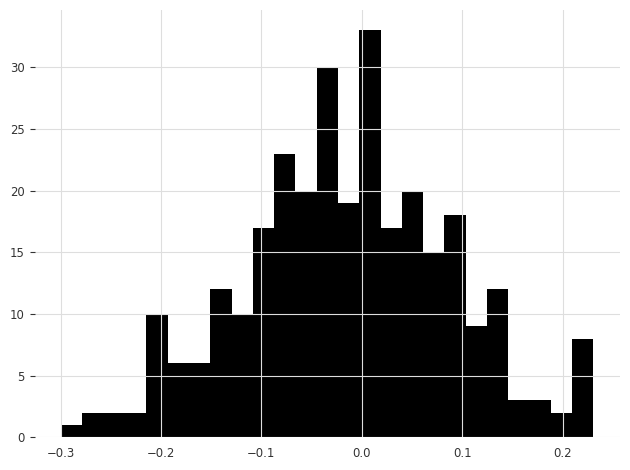

In [86]:
plt.hist(noise, bins=25)